In [21]:
%pylab inline
import os
import seaborn as sns
import pickle as pkl
pal = sns.color_palette('Blues')
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
#sns.set(color_codes=True)
from scipy.stats import gaussian_kde
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [30]:
myDicts = pkl.load( open ('/users/global/cornkle/data/OBS/test/test_old.p', 'rb'))#MSG_TRMM_temp_pcp_300px2004-2013_new.p', 'rb'))

In [31]:
dic=myDicts[0]
dicf=myDicts[1]

In [32]:
p=np.array(dic['pp']) # 98th perc per MCS
t=np.array(dic['t'])  #mean T
print('Number MCSs:', p.size)
print('98th perc:', np.nanmean(np.array(dic['perc'])))

Number MCSs: 1613
98th perc: 29.5575427559


In [33]:
pc = p[p<81]
tm = t[p<81]

In [34]:
binst=list(range(-70, -39, 1))   # compute probability with regard to threshold with -70 a subset of -40
cum=[]
for i in binst:
    pos = np.where(tm <= i)
    ptresh = pc[pos]
    prob=np.sum(ptresh>30)/ptresh.size
    cum.append(prob)
list(zip(binst,cum))
cum = np.array(cum)*100.

In [35]:
bins=list(range(-75, -39, 1))   # compute probability per temperature range (1degC) 
po30=np.where(pc > 30)  
to30=tm[po30]   

H1, bins1 = np.histogram(to30, bins=bins, range=(tm.min(), tm.max()))
H, bins = np.histogram(tm, bins=bins, range=(tm.min(), tm.max()))
H=H.astype(float)
H1=H1.astype(float)
histo=H1/H*100.
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

In [36]:
H, xedges, yedges = np.histogram2d(tm, pc, bins=(25, 25))
hh = (H / np.sum(H))*100.
np.sum(hh)

100.0

1.0 5.0 8.0


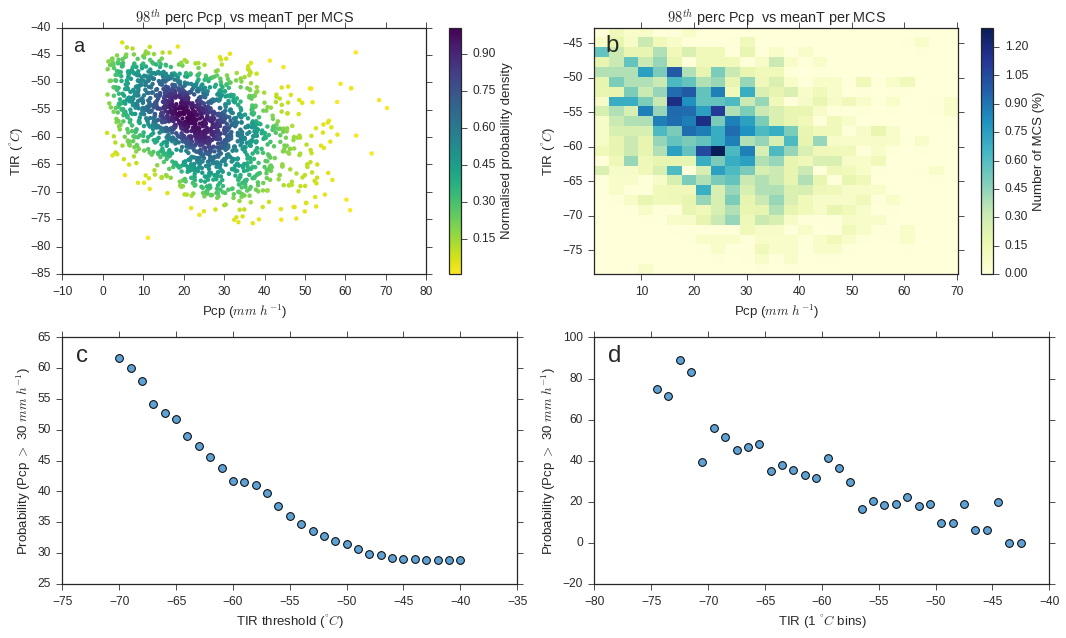

In [37]:
path = '/users/global/cornkle/C_paper/figs/'
fig = plt.figure(figsize=(15, 9), dpi=400)

ax1 = fig.add_subplot(221)
xy = np.vstack([pc,tm])
z = gaussian_kde(xy)(xy)
test = z / (z.max() - z.min())
mappable = ax1.scatter(pc, tm, c=test, edgecolor='', cmap='viridis_r')
ax1.set_xlabel('Pcp ($mm\ h^{-1}$)')
ax1.set_ylabel('TIR ($^{\degree}C$)')
ax1.set_title('$98^{th}$ perc Pcp  vs meanT per MCS')
cbar = fig.colorbar(mappable)
cbar.set_label('Normalised probability density')
text(0.03, 0.9, 'a', transform=ax1.transAxes, fontsize=20)
######################
ax1 = fig.add_subplot(222)


p25=np.percentile(H, 50)
p50=np.percentile(H, 80)
p75=np.percentile(H, 90)
print(p25,p50,p75)

dy = yedges[1]-yedges[0]
dx = xedges[1]-xedges[0]
extent_dens = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
extent_cont = [yedges[0]+dy/2, yedges[-1]-dy/2, xedges[0]+dx/2, xedges[-1]-dx/2]
#subplots_adjust(bottom=0.15, left=0.15)
levels = (p75, p50, p25)
mappable=ax1.imshow(hh,origin='lower',extent=extent_dens,aspect='auto', interpolation='none', cmap='YlGnBu')
cbar = fig.colorbar(mappable)
cbar.set_label('Number of MCS (%)')
ax1.set_title('$98^{th}$ perc Pcp  vs meanT per MCS')
ax1.set_xlabel('Pcp ($mm\ h^{-1}$)')
ax1.set_ylabel('TIR ($^{\degree}C$)')
#cset = plt.contour(hh, levels, origin='lower',colors=['grey', 'black','red'],linewidths=(1.9, 1.6, 1.5, 1.4),extent=extent_cont)
#plt.clabel(cset, inline=1, fontsize=10, fmt='%1.0i')
#for c in cset.collections:
#    c.set_linestyle('solid')
text(0.03, 0.9, 'b', transform=ax1.transAxes, fontsize=24)
    
    #####################################

ax1 = fig.add_subplot(223)
ax1.scatter(binst, cum, marker="o",color='#5ea1d4', s=60, zorder=2, edgecolor = 'black', linewidth=1)
ax1.set_xlabel('TIR threshold ($^{\degree}C$)')
ax1.set_ylabel('Probability (Pcp $>$ 30 $mm\ h^{-1}$)') 
text(0.03, 0.9, 'c', transform=ax1.transAxes, fontsize=24)

ax1 = fig.add_subplot(224)
ax1.scatter(center, histo, marker="o",color='#5ea1d4', s=60, zorder=2, edgecolor = 'black', linewidth=1)
ax1.set_xlabel('TIR (1 $^{\degree}C$ bins)')
ax1.set_ylabel('Probability (Pcp $>$ 30 $mm\ h^{-1}$)') 
text(0.03, 0.9, 'd', transform=ax1.transAxes, fontsize=24)


plt.tight_layout()
#plt.savefig(path+'TRMM_MSG_scatter.png')

In [38]:
dicf.keys()

dict_keys(['ppconv', 'pconv', 'tnfconv', 'lat', 'tconv', 'yr', 'pmaxconv', 'perc', 'tpixel_stratNZ', 'piconv', 'mon', 'tpixel_convNZ', 'hod', 'lon'])

In [39]:
dic.keys()

dict_keys(['t', 'mon', 'tpixel_derived', 'lat', 'twhole', 'tpixel_zero', 'tpixel', 'pmax', 'perc', 'tpixel_nzero', 'yr', 'lon', 'p', 'tpixel_strat', 'pp', 'pi', 'hod', 'tpixel_conv', 'area'])

In [40]:
tt=np.array(dic['t'])
conv_nz = np.array(dicf['tpixel_convNZ'])
conv = np.array(dic['tpixel_conv'])
t_nz = np.array(dic['tpixel_nzero'])

In [41]:
tt.size

1613

In [42]:
at40=np.sum(conv_nz)/np.sum(t_nz)
at70=np.sum(conv_nz[tt<=-70])/np.sum(t_nz[tt<=-70])
print('Conv frac below -40: ', at40, 'below -70', at70)

Conv frac below -40:  0.203741672596 below -70 0.304386660125
